<a href="https://colab.research.google.com/github/USinani/OpenCV/blob/master/Object_detection_and_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project goal


# Import libraries

In [0]:
import cv2 as cv, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import glob

%matplotlib inline

# Sources

In [0]:

# Some sources for reference
# https://github.com/search?l=Python&q=Object+detection&type=Repositories
# sources: https://datahack.analyticsvidhya.com/
# https://github.com/analyticsvidhya
# https://github.com/xingyizhou



# Import images

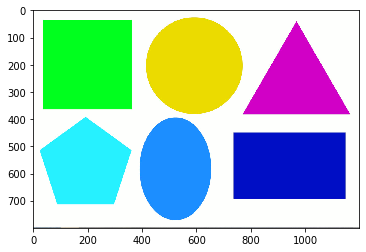

In [2]:
# import an image from directory
image = cv.imread('image.jpg')
plt.imshow(image)

In [0]:
def draw_img():

  # Draw an image using Numpy library
  # OpenCV example: img = np.zeros((512,512,3), np.uint8)
  shape = (512, 512, 3)
  # image = np.zeros(shape, np.uint8)

  # draw a circle
  # OpenCV example: cv.circle(img,(447,63), 63, (0,0,255), -1)
  cx, cy = 447, 63
  circle = cv.circle(img = image, center = (cx, cy) , radius= 30, color = (255, 0, 0), thickness = -1)

  # Draw a line
  line = cv.line(image,(0,0),(511,511),(255,0,0), 5)

  # Draw a rectangle
  rectangle = cv.rectangle(image, (33,99), (330, 500), (0, 255, 0), 3)

  # return image

# image = draw_img()
# plt.imshow(draw_img())

# Test directory

In [0]:
path = 'image.jpg'

# dir = os.listdir(path)

# Build pipleline

https://arxiv.org/pdf/1904.07850.pdf

Why object detection power many vision tasks
-instance segmentation
-pose estimation
-tracking
-action recognition


In [0]:
def flow_chart():
  # start
  # process
  # decision
  # finish
  pass

In [0]:
def img_cvt():

  """ function that will convert imag to different color spaces"""

  # image = cv.imread('image.jpg')
  '''
  # color space conversions
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
  hls = cv.cvtColor(image, cv.COLOR_BGR2HLS)
  yuv = cv.cvtColor(image, cv.COLOR_BGR2YUV)

  # printing out some stats and plotting
  print('This image is:', type(image), 'with dimensions:', image.shape)
  print('This image is:', type(gray), 'with dimensions:', gray.shape)
  print('This image is:', type(hsv), 'with dimensions:', hsv.shape)
  print('This image is:', type(hls), 'with dimensions:', hls.shape)
  print('This image is:', type(yuv), 'with dimensions:', yuv.shape)
  '''
  gray = cv.COLOR_BGR2GRAY
  hsv = cv.COLOR_BGR2HSV
  hsl = cv.COLOR_BGR2HLS
  yuv = cv.COLOR_BGR2YUV

  color_space = [
                  cv.COLOR_BGR2GRAY,
                  cv.COLOR_BGR2HSV,
                  cv.COLOR_BGR2HLS,
                  cv.COLOR_BGR2YUV 
                  ]

  color_space_name = [
                  gray,
                  hsv,
                  hsl,
                  yuv ]

  cvt_img = cv.cvtColor(image, color_space_name[0])

  return cvt_img

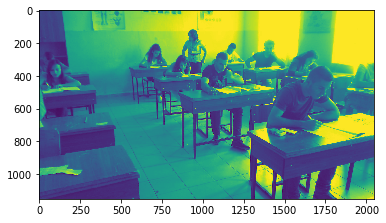

In [0]:
plt.imshow(img_cvt())

Next : Try to build using classes

In [0]:
class solution:
  def __init__(self, image):
    self.image = image


  def img_conversion():
    """ this function will convert images to a different color space"""
    self.image = image

    # convert to a differet color space

    # return converted image

    gray = cv.cvtColor(self.image, cv.COLOR_BGR2GRAY)

  return gray

In [0]:
plt.imshow(solution.img_conversion())

NameError: ignored

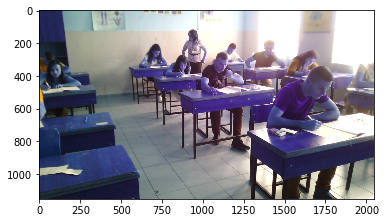

In [11]:
def img_filter():
  # image = 'image.jpg'
  # image = cv.imread(image)
  kernel_size = (3,3)
  gaussian_blur = cv.GaussianBlur(src = image, ksize = kernel_size, sigmaX = 0 )
  blur = cv.blur(src = image, ksize = (3,3))

  return gaussian_blur, blur

plt.imshow(img_filter()[1])

In [0]:
# resources: 
# https://stackoverflow.com/questions/31281235/anomaly-with-ellipse-fitting-when-using-cv2-ellipse-with-different-parameters
# https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/
# http://amroamroamro.github.io/mexopencv/opencv/generic_corner_detector_demo.html
# https://stackoverflow.com/questions/55621959/opencv-fitting-a-single-circle-to-an-image-in-python
# https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

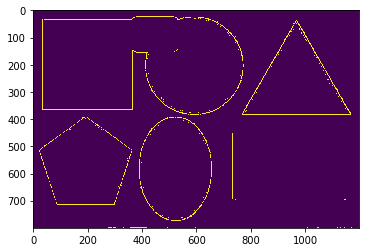

In [16]:
# Edge detector
# apply Canny()
gray_scale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
kernel_size = (3,3)
gaussian_blur = cv.GaussianBlur( src = gray_scale, ksize = kernel_size, sigmaX = 0 )
thresh1, thresh2 = 255, 255
canny_edges = cv.Canny( gaussian_blur, thresh1, thresh2 )

# apply threshold()
# example: ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
thresh = 127
maxval = 255
thresh_type = cv.THRESH_BINARY
ret, threshold = cv.threshold(image, thresh, maxval, thresh_type)

# apply adaptiveThreshold()
# example: 
max_val = 255
adaptive_method = cv.ADAPTIVE_THRESH_GAUSSIAN_C
thresh_type = cv.THRESH_BINARY

# Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on
# apply adaptiveThreshold()
block_size = 7
adaptive_threshold = cv.adaptiveThreshold(gray_scale, max_val, adaptive_method, thresh_type, block_size, -1)

# range = cv.inRange()
# draw_cnt = cv.drawContours()

# plt.imshow(canny_edges)
# plt.imshow(threshold)
plt.imshow(adaptive_threshold)

In [0]:
def roi():

  """ the function will define the region of interest """

  # Region Of Interest shape
  xt, yt, xb, yb = 10, 20, 30, 40
  xl, yl, xr, yr = 30, 60, 70, 80
  top, bottom = (xt, yt), (xb, yb)
  left, right = (xl, yl), (xr, yr)
  coordinates = np.array([top, left, bottom, right])
  
  # circle = cv.circle(img = image, center = (10, 10), radius = 100, color = (0, 255, 0), thickness = 10)
  img = cv.rectangle(image, (384, 50), (510, 128), (0, 255, 0), 3)

  # mask = cv.inRange()
  # mask = cv.bitwise_and()

  return img

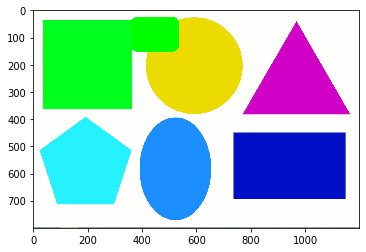

In [15]:
plt.imshow(roi())

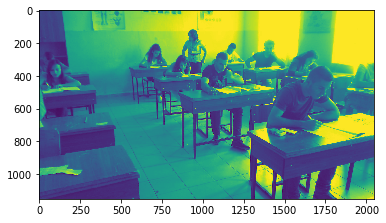

In [0]:
# Detect object

# image = cv.imread('image.jpg')

gray_scale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# apply neccessary transformations



# define the area

# circular, square, triangle with x, y coordinates

# define the area automatically, how?


# apply mathematical methods to approximating features/objects of interest in the picture


# plot the result
plt.imshow(gray_scale)